
Ploting the initial testing data: 


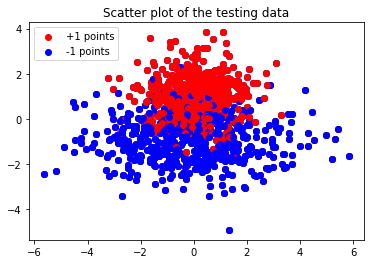


The C parameter is set to 1
     pcost       dcost       gap    pres   dres
 0: -3.5253e+02 -2.3507e+03  1e+04  3e+00  6e-15
 1: -2.2261e+02 -1.4490e+03  1e+03  1e-01  5e-15
 2: -2.5034e+02 -4.5415e+02  2e+02  1e-02  4e-15
 3: -2.7281e+02 -3.2568e+02  5e+01  3e-03  4e-15
 4: -2.7888e+02 -2.9855e+02  2e+01  8e-04  4e-15
 5: -2.8141e+02 -2.8878e+02  7e+00  2e-04  4e-15
 6: -2.8236e+02 -2.8544e+02  3e+00  8e-05  4e-15
 7: -2.8289e+02 -2.8394e+02  1e+00  2e-05  4e-15
 8: -2.8306e+02 -2.8352e+02  5e-01  5e-06  4e-15
 9: -2.8317e+02 -2.8328e+02  1e-01  5e-07  5e-15
10: -2.8319e+02 -2.8324e+02  4e-02  8e-08  5e-15
11: -2.8321e+02 -2.8322e+02  9e-03  2e-09  5e-15
12: -2.8321e+02 -2.8321e+02  2e-03  4e-10  4e-15
13: -2.8321e+02 -2.8321e+02  2e-04  4e-11  5e-15
Optimal solution found.
Misclassification count:  169
Misclassification Accuracy:  16.90%


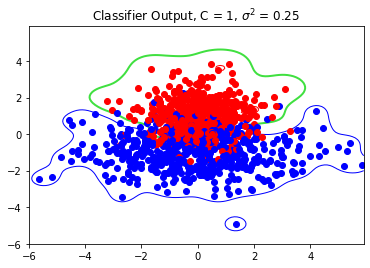


The C parameter is then converted to 10^6
     pcost       dcost       gap    pres   dres
 0:  1.0808e+13 -2.3715e+14  3e+14  4e-02  3e-09
 1:  3.0889e+12 -2.5829e+13  3e+13  4e-03  4e-07
 2:  8.1606e+11 -4.9570e+12  6e+12  4e-04  5e-08
 3:  2.1423e+11 -1.3195e+12  2e+12  5e-05  6e-09
 4:  6.7044e+10 -5.5763e+11  6e+11  3e-10  2e-09
 5:  1.9933e+10 -1.2544e+11  1e+11  6e-10  2e-09
 6:  5.7964e+09 -4.8359e+10  5e+10  4e-09  3e-09
 7:  1.3053e+09 -8.0731e+09  9e+09  7e-10  2e-09
 8:  2.2069e+08 -1.7441e+09  2e+09  7e-09  2e-09
 9: -2.8718e+07 -6.0288e+08  6e+08  3e-09  2e-09
10: -1.0518e+08 -3.5235e+08  2e+08  7e-10  2e-09
11: -1.3717e+08 -2.1753e+08  8e+07  6e-09  3e-09
12: -1.4671e+08 -1.9022e+08  4e+07  8e-09  3e-09
13: -1.5323e+08 -1.7080e+08  2e+07  5e-09  3e-09
14: -1.5629e+08 -1.6268e+08  6e+06  8e-09  3e-09
15: -1.5741e+08 -1.5981e+08  2e+06  2e-10  3e-09
16: -1.5799e+08 -1.5868e+08  7e+05  5e-09  3e-09
17: -1.5816e+08 -1.5838e+08  2e+05  1e-09  3e-09
18: -1.5821e+08 -1.5829e+08

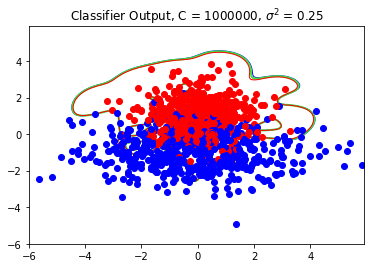

In [2]:
## -------------------------------------------------------------------------
##
## CE4708 - Artificial Intelligence
## Semester 1 - Autumn 2017/18
##
## 30-11-2018
##
## Group Members:-
## Ciaran Carroll (13113259)
##
## Develop a program in Python to implement a soft-margin, kernel-based
## Support Vector Machine (SVM) classifier
##
## Outline:-
## This project implements a radial basis function kernel with
## sigma^2 = 0.25.
## The program is trained using the training-dataset-aut-2017.txt file
## and subsequently tested using testing-dataset-aut-2017.txt.
##
## Two values are used for the C parameter, C = 1.0 and C = 10^6
## The Python CVXopt library is used to implement the QP-solver function
##
## --------------------------------------------------------------------------

from cvxopt import matrix, solvers, sparse
from math import exp
import numpy as np
from matplotlib import pyplot as plt

## Loads training datasets from txt files
## Split files into input (Xs1) and expected output (Ts1)
## Break up input (Xs1) into X1 and Y1 input values.
dataset1 = np.loadtxt('training-dataset-aut-2018.txt')
Xs1, Ts1 = dataset1[:, :2], dataset1[:, 2]
X1 = dataset1[:, :1]
Y1 = dataset1[:, 1:2]

## Loads testing datasets from txt files
## Split files into input (Xs2) and expected output (Ts2)
## Break up input (Xs2) into X2 and Y2 input values.
dataset2 = np.loadtxt('testing-dataset-aut-2018.txt')
Xs2, Ts2 = dataset2[:, :2], dataset2[:, 2]
X2 = dataset2[:, :1]
Y2 = dataset2[:, 1:2]

##  Define C parameter for classifier.
##  Test the dataset with C = 1.0 and C = 10^6
#C = 1
#C = 1000000

# Function plots a given datasets

def plotDatasets(Xs, Ts, X, Y, title):
    # Ploting the testing dataset
    plt.title(title)

    for i, t in enumerate(Ts):
        if t < 0:
            col = 'blue'		## -1 values
        else:
            col = 'red'			## +1 values
        plt.plot([Xs[i][0]], [Xs[i][1]], marker='o', color=col)

    plt.scatter(X, Y, c='r', label='+1 points')
    plt.scatter(X, Y, c='b', label='-1 points')

    plt.legend(loc='upper left');
    plt.show()

## Function returns a radial basis function with a sigma2 of 0.25

def rbfKernel(v1, v2, sigma2=0.25):
    assert len(v1) == len(v2)
    assert sigma2 >= 0.0
    mag2 = sum(map(lambda x, y: (x - y) * (x - y), v1, v2))  ## Squared mag of diff.
    return exp(-mag2 / (2.0 * sigma2))

## Function makes the P matrix for the rbf kernel-based SVM problem.

def makeP(xs, ts, K):
    """Make the P matrix given the list of training vectors,
       desired outputs and kernel."""
    N = len(xs)
    assert N == len(ts)
    P = matrix(0.0, (N, N), tc='d')
    for i in range(N):
        for j in range(N):
            P[i, j] = ts[i] * ts[j] * K(xs[i], xs[j])
    return P

## Uses the qp solver from the cvxopt package to find the list of lagrange
## multipliers (lambdas or L's) for an Xs/Ts problem, where Xs is a list of
## input vectors and Ts is a list of desired outputs.

## The solutuon is returned by the 'qp' solver as a vector of elements.
## The solver actually returns a dictionary of values which contains a lot of
## information about the solution, quality, etc.

def makeLambdas(Xs, Ts, K=rbfKernel):
    "Solve constrained maximization problem and return list of l's."
    P = makeP(Xs, Ts, K)            ## Build the P matrix.
    n = len(Ts)                     ## Length of Dataset, used to create other matrices
    q = matrix(-1.0, (n, 1))        ## This builds an n-element column
                                    ## vector of -1.0's (note the double-
                                    ## precision constant)
    h1 = matrix(0.0, (n, 1))        ## create one column matrix of n 0's

    h2 = matrix(C, (n, 1))          ## create one column matrix of n C's

    hcon = np.concatenate([h1, h2])
    h = matrix(hcon)                ## Concatenate h1 and h2 matrices to
                                    ## to create h matrix

    G1 = matrix(0.0, (n, n))        ## These lines generate G1, an

    G1[::(n + 1)] = -1.0            ## n x n matrix with -1.0's on its
                                    ## main diagonal

    G2 = matrix(0.0, (n, n))        ## These lines generate G, an
    G2[::(n + 1)] = 1.0             ## n x n matrix with 1.0's on its
                                    ## main diagonal.

    Gcon = np.concatenate((G1, G2)) ## This line concatenates G1 and G2
                                    ## creating a 2n x n matrix with
                                    ## -1.0s on diagonal 1 and 1.0s on
                                    ## diagonal 2.
    G = matrix(Gcon)

    A = matrix(Ts, (1, n), tc='d')

    ## Now call "qp". Details of the parameters to the call can be
    ## found in the online cvxopt documentation.

    r = solvers.qp(P, q, G, h, A, matrix(0.0))  ## "qp" returns a dict, r.

    ## Return results. Return a tuple, (Status,Ls).  First element is
    ## a string, which will be "optimal" if a solution has been found.
    ## The second element is a list of Lagrange multipliers for the problem,
    ## rounded to six decimal digits to remove algorithm noise.

    Ls = [round(l, 6) for l in list(r['x'])]  ## "L's" are under the 'x' key.
    return (r['status'], Ls)

## Finds the bias for this kernel-based classifier

def makeB(Xs, Ts, Ls=None, K=rbfKernel):
    "Generate the bias given Xs, Ts and (optionally) Ls and K"

    ##  If there is no Lagrange multipliers supplied, generate them.
    if Ls == None:
        status, Ls = makeLambdas(Xs, Ts)
        ## If Ls generation failed (non-seperable problem) throw exception
        if status != "optimal": raise Exception("Can't find Lambdas")
        print("Lagrange multipliers: ", Ls)


    ## Calculate bias as average over all support vectors (non-zero
    ## Lagrange multipliers.
    sv_count = 0
    b_sum = 0.0
    for n in range(len(Ts)):
        if Ls[n] >= 1e-10:  ## 1e-10 for numerical stability.
            sv_count += 1
            b_sum += Ts[n]
            for i in range(len(Ts)):
                if Ls[i] >= 1e-10:
                    b_sum -= Ls[i] * Ts[i] * K(Xs[i], Xs[n])

    return b_sum / sv_count

## Classify the single input vector using a trained nonlinear SVM.

def classify(x, Xs, Ts, Ls=None, b=None, K=rbfKernel, verbose=False):
    "Classify an input x into {-1,+1} given support vectors, outputs and L."

    ## If there is no Lagrange multipliers supplied, generate them.
    if Ls == None:
        status, Ls = makeLambdas(Xs, Ts)
        ## If Ls generation failed (non-seperable problem) throw exception
        if status != "optimal": raise Exception("Can't find Lambdas")

    ## Calculate bias as average over all support vectors (non-zero
    ## Lagrange multipliers.
    if b == None:
        b = makeB(Xs, Ts, Ls, K)
    ### Do classification.  y is the "activation level".
    y = b
    for n in range(len(Ts)):
        if Ls[n] >= 1e-10:
            y += Ls[n] * Ts[n] * K(Xs[n], x)

    if verbose:
        print("%s %8.5f  --> " % (x, y))
        if y > 0.0:
            print("+1")
        elif y < 0.0:
            print("-1")
        else:
            print("0  (ERROR)")


    ## Return classification results, either +1 or -1
    if y > 0.0:
        return +1
    elif y < 0.0:
        return -1
    else:
        return 0

##  Calculate the activation level of an input X given a set of
##  training inputs, Xs, desired (training) outputs Ts, Lagrange
##  multipliers Ls, bias b and kernel function K.

def activation(X,Xs,Ts,Ls,b,K):
    """Return activation level of a point X = [x1,x2,....] given
       training vectors, training (i.e., desired) outputs, Lagrange
       multipliers, bias and kernel."""
    y = b
    for i in range(len(Ts)):
        if Ls[i] >= 1e-10:
            y += Ls[i] * Ts[i] * K(Xs[i],X)
    return y

##  Test a trained nonlinear SVM on all vectors from its training set.  The
##  kernel is quadratic polynomial by default.

def testClassifier(Xs, Ts, Ls, b=None, K=rbfKernel, verbose=False):
    "Test a classifier specifed by Lagrange mults, bias and kernel on all Xs/Ts pairs."
    #assert len(Xs) == len(Ts)

    ## No Ls supplied, generate them.
    if Ls == None:
        status, Ls = makeLambdas(Xs2,Ts2,C,K=rbfKernel)
        ## If Ls generation failed (non-seperable problem) throw exception
        if status != "optimal": raise Exception("Can't find Lambdas")
        #print("Lagrange multipliers:", Ls)

    ## Calculate bias as average over all support vectors (non-zero
    ## Lagrange multipliers.
    if b == None:
        b = makeB(Xs,Ts,C,Ls,K=rbfKernel)
        print("Bias:", b)

    ## Do classification test.
    ## Create variable to count number of misclassifications
    misclassificationCount = 0
    good = True
    for i in range(len(Xs)):
        c = classify(Xs[i],Xs1,Ts1,Ls,b,K=K)
        if c != Ts[i]:
            misclassificationCount += 1
            if verbose:
                #print("Misclassification: input %s, output %d, expected %d" %\
                #    (Xs[i],c,Ts[i]))
                print("Misclassification: input {}, output {:d}, "
                    "expected {:d}".format(Xs[i], c, Ts[i]))
            good = False

    print('Misclassification count: ', misclassificationCount)
    classificationAccuracy = (misclassificationCount*100)/len(Ts)
    print("Misclassification Accuracy: {:6.2f}%".format(classificationAccuracy))

    minRange = -6.0
    maxRange = 6.0
    step = 0.1

    # Generate range of 'activation levels' from SVM
    xs = np.arange(minRange,maxRange,step)
    ys = np.arange(minRange,maxRange,step)
    als = np.array([[activation([y,x],Xs,Ts,Ls,b,K) for y in ys] for x in xs])


    ## Functions to plotAbout contour at -1, 0 and +1 levels in
    ## blue, green and red. Add title with C parameter.
    plt.figure()
    plt.title('Classifier Output, C = ' + str(C) + ', $\sigma^2$ = 0.25')

    plt.contour(xs, ys, als, levels=[-0.85, 0.0, 1.15], linewidths=(1, 2, 1), colors=('blue', '#40e040', 'red'))
    ## Old contour function
    #plt.contour(xs, ys, als, levels=[-1.0, 0.0, 1.0], linewidths=(1, 2, 1), colors=('blue', '#40e040', 'red'))

    # Plot points, if/else decides whether the points are
    # blue (-1) or red (+1)
    for i, t in enumerate(Ts):
        if t < 0:
            col = 'blue' ## -1 values
        else:
            col = 'red' ## +1 values
        plt.plot([Xs[i][0]], [Xs[i][1]], marker='o', color=col)

    plt.show()

#print('Ploting the initial trainng data: ')
#plotDatasets(Xs1, Ts1, X1, Y1,  title = 'Scatter plot of the training data')

print('')
#print('Program is trained using the training data')


##  Define C parameter for classifier.
##  Test the dataset with C = 1.0 and C = 10^6

## Define the C parameter for classifier
#C = 1

## Execute makeLamdas and makeB functions and assign them to
## appropriate variables
## Feed these variables to testClassifier function in order to
## classify and plot dataset with classification boundaries
## and margins
#status, Ls = makeLambdas(Xs1,Ts1,K=rbfKernel)
#b = makeB(Xs1,Ts1,Ls,K=rbfKernel)
#testClassifier(Xs1,Ts1,Ls,b, K=rbfKernel)

#print('')

#C = 1000000

## Execute makeLamdas and makeB functions and assign them to
## appropriate variables
## Feed these variables to testClassifier function in order to
## classify and plot dataset with classification boundaries
## and margins
#status,Ls = makeLambdas(Xs1,Ts1,K=rbfKernel)
#b = makeB(Xs1,Ts1,Ls,K=rbfKernel)
#testClassifier(Xs1,Ts1,Ls,b, K=rbfKernel)

#print('')

print('Ploting the initial testing data: ')
plotDatasets(Xs2, Ts2, X2, Y2, title = 'Scatter plot of the testing data')

print('')
print('The C parameter is set to 1')

C = 1

## Execute makeLamdas and makeB functions and assign them to
## appropriate variables
## Feed these variables to testClassifier function in order to
## classify and plot dataset with classification boundaries
## and margins
status,Ls = makeLambdas(Xs2,Ts2,K=rbfKernel)
b = makeB(Xs2,Ts2,Ls,K=rbfKernel)
testClassifier(Xs2,Ts2,Ls,b, K=rbfKernel)

print('')
print('The C parameter is then converted to 10^6')

C = 1000000

## Execute makeLamdas and makeB functions and assign them to
## appropriate variables
## Feed these variables to testClassifier function in order to
## classify and plot dataset with classification boundaries
## and margins
status,Ls = makeLambdas(Xs2,Ts2,K=rbfKernel)
b = makeB(Xs2,Ts2,Ls,K=rbfKernel)
testClassifier(Xs2,Ts2,Ls,b, K=rbfKernel)
